# DORY. An exploration of barge movements on Western-Europe waterways
Western-Europe has a broad river delta reaching from the shores off the Netherlands and Belgium through Germany and France to the mountains of Zwitserland. This river delta is used as a blue road for the transport of many types of goods like general goods in containers, commodities, cars, oil, mineral and gas. Although the barge is a slower transportation method than a truck or train, the amounts tranported per barge, CO2 emissions per litre, the connection with deepsea transport and the reliablity of infrastructure are all excellent arguments for shippers to choose the barge as transportation type.

In this study we'll dive into location data of barges to explore the speeds of barges. This information could be used to enhance estimations of arrival times which contributes to the reliability and therefore reputation of the transportation type.

## Exploratory analysis
This code will explore the data with visuals to get a better understanding of the data.

In [1]:
cd \users\frank\jupyter notebook\logistics\data

C:\users\frank\jupyter notebook\logistics\data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

C:\Users\Frank\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
bp = pd.read_csv('Ubargepositionapril.csv')

In [4]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420796 entries, 0 to 420795
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   shipid           420796 non-null  int64  
 1   speed            420796 non-null  float64
 2   course           420796 non-null  float64
 3   location         420796 non-null  object 
 4   code             181408 non-null  object 
 5   type             420796 non-null  object 
 6   latitude         260324 non-null  float64
 7   longitude        260324 non-null  float64
 8   encodedpolyline  361753 non-null  object 
 9   capacityton      420796 non-null  int64  
 10  length_m         420796 non-null  float64
 11  width_m          420796 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 38.5+ MB


In [5]:
bp.describe()

,shipid,speed,course,latitude,longitude,capacityton,length_m,width_m
count,420796.000000,420796.000000,420796.000000,260324.000000,260324.000000,420796.000000,420796.000000,420796.000000
mean,875.427730,4.189061,148.747864,52.040682,6.753961,4431.279803,112.943143,12.926024
std,99.077007,6.704703,117.622157,1.111094,2.356043,1867.327094,17.771487,2.062898
min,737.000000,0.000000,0.000000,47.573121,3.598623,1552.000000,85.000000,9.500000
25%,833.000000,0.000000,33.400000,51.523105,4.485169,2912.000000,99.000000,11.450000
50%,839.000000,0.000000,134.200000,51.888030,6.603985,4424.000000,110.000000,13.500000
75%,842.000000,9.800000,260.600000,53.337392,9.890785,6535.000000,135.000000,15.000000
max,1100.000000,27.000000,359.900000,53.897016,10.494690,8730.000000,135.000000,17.550000


## General exploration

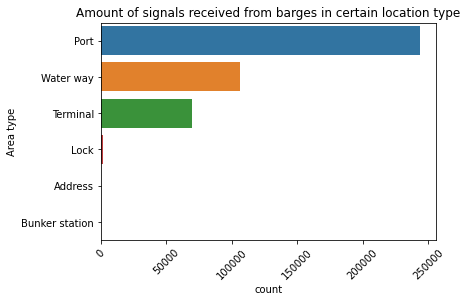

In [6]:
# create insight in amount of signals barges have received per location type
sb.countplot(y=bp['type'],order = bp['type'].value_counts().index)
plt.xticks(rotation = 45)
plt.ylabel('Area type')
plt.title('Amount of signals received from barges in certain location type');

It appears that most of the time barges are located in a port, waterway or terminal.
The amount of port signals seem especially big. Reasons herefore could be the coverage of GPS signals in ports and the overnight or weekend stays. For longer periodes of time Captains will mainly rest in ports.

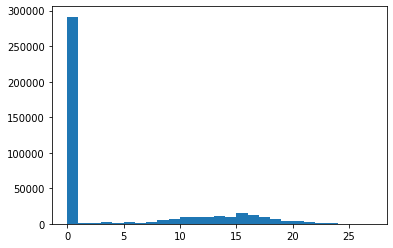

In [7]:
# Create bin criteria
bin_edges = np.arange(0,bp['speed'].max()+1,1)

# Plot histogram
plt.hist(bp['speed'], bins=bin_edges);

The histogram shows that a barge has a speed of 0 km/ph for most of the time. This supports the observation made regarding the extensive time a barge stays in the ports. Lets research further by splitting the histogram.

In [8]:
# Split the location types based on at least 50000 signal counts, undercutting locks, addresses and bunker stations.
count_type = bp['type'].value_counts()
top_type = count_type > 1200
top_type = top_type[top_type == True]
lst_type = np.array(top_type.index)
lst_type

array(['Port', 'Water way', 'Terminal'], dtype=object)

In [9]:
# Create copy of filtered dataframe for further exploration
bp_sub1 = bp[bp['type'].isin(lst_type)].copy()
bp_sub1['type'].value_counts()

Port         243752
Water way    106166
Terminal      69564
Name: type, dtype: int64

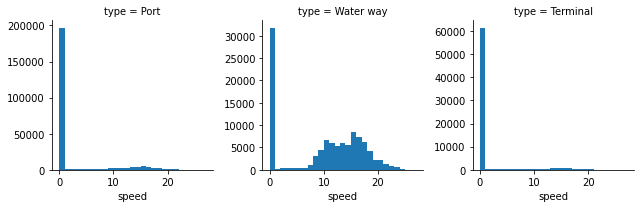

In [10]:
# Create bin criteria
g = sb.FacetGrid(data = bp_sub1, col = 'type', col_wrap = 3, sharey = False)

# Plot histogram
g.map(plt.hist, 'speed', bins=bin_edges);

We unexpectedly observe that not only in the port or terminal, but also on waterway barges lay still. But on the otherside we also see that the fluctuation of speed is mainly on waterways. For water ways it seems to be a bimold distribution. This is different than de distrubution of terminals and ports which seem normally distributed. Why is that? Let's look further in the data.

In [11]:
# Drop row with speed of 0 such that we're able to read the data beter

bp_sub2 = bp_sub1[bp_sub1['speed'] >= 1]

In [12]:
# Test
bp_sub2['speed'].value_counts()

15.6    2747
15.9    2642
16.7    2631
15.7    2508
16.9    2478
        ... 
26.1       3
25.9       2
26.3       2
26.5       1
27.0       1
Name: speed, Length: 139, dtype: int64

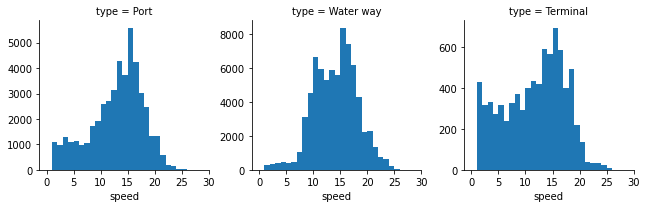

In [13]:
# Create bin criteria
g = sb.FacetGrid(data = bp_sub2, col = 'type', col_wrap = 3, sharey = False)

# Plot histogram
g.map(plt.hist, 'speed', bins=bin_edges)
x_ticks = 0,5,10,15,20,25,30
g.set(xticks = x_ticks);

The location types have great similarities. The peak speeds are between 15 and 20 km/ph and top speed don't seem to be more than 25 km/ph in most cases.

Beside similarities there're also obvious differences. 

In ports vessels seem to have an normal distribution. This seems to be obvious behavior. Ports are passed through or sailed for a period of time before arriving at a destination.

In terminals the distribution leans towards a uniform distrubution, although a speed between 12 and 19 km/ph stands out. Because the purpose of a terminal is to dock barges, it's logical that lower speeds are more common. Barges should slow down and start up when mooring or unmooring. The peaks would suggest the sailing past a terminal is a common activity.

On waterways we clearly see a bimodal distribition. This is odd. Why would we witness this? What would influence the speed in this way?

## Exploration of waterway movements

Why are vessel speeds on waterways bimodal?

Does the size of a vessel influence the average speed?
Does the sailing direction of a vessel influence the average speed?

To answer these questions we'll:

1. Trimm data set to only water way movements
2. Plot on capacityton or length for size
3. Create headings for course and calculate average per heading

In [14]:
# trim data to only water way movements
bp_ways = bp_sub2[bp_sub2['type'] == 'Water way'].copy()

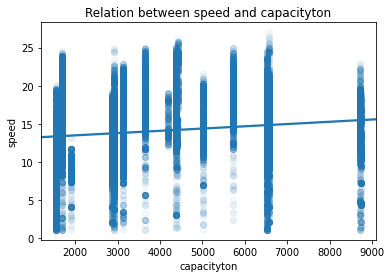

In [15]:
# Plot on capacityton
sb.regplot(data = bp_ways, x = 'capacityton', y = 'speed', scatter_kws = {'alpha': 0.05})
plt.title('Relation between speed and capacityton');

The data seems to show a positive relation between speed and the capacity cargo a barge can load measured in ton. This seems illogical. Perhaps it's true, or perhaps the capacity is allocated on different water ways. That could inlfuence the speed.

In [16]:
# amount of capacityton unique vallues
bp_ways['capacityton'].nunique()

21

In [17]:
# amount of capacityton unique vallues
bp_ways['width_m'].nunique()

10

In [18]:
# amount of capacityton unique vallues
bp_ways['length_m'].nunique()

5

The capacityton has 21 unique values, which means it isn't suited for a violin plot. The width of the barge in meters has 10 values. Still a lot.The length og barges has 5 values. If there is a positive correlation between length of barge and the capacityton we could use those values. 

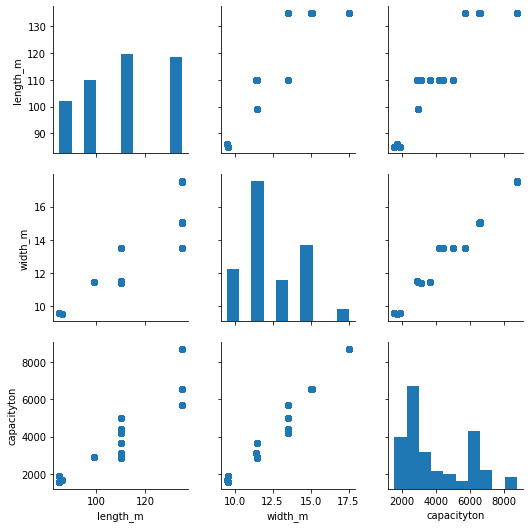

In [19]:
# plot matrices to see validate the correlation between length and capacity ton
stats = ['length_m', 'width_m', 'capacityton']
g = sb.PairGrid(data = bp_ways, vars = stats)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

Both width as length seem to have a positive relation with the capacity of a barge in tonnage. Although the correlation with width seems stronger, strength seems strong enough for further exploration.

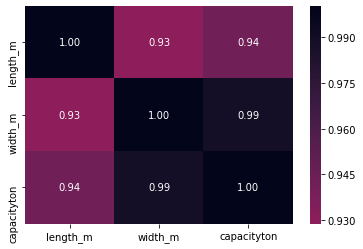

In [20]:
# plot heathmap to clearify correlation.
sb.heatmap(bp_ways[stats].corr(), annot = True, fmt = '.2f', cmap = 'rocket_r', center = 0.9);

 Although the width of a barge has a stronger correlation with capacity in tonnage, the relation with the length is deemed strong enough for further analysis.

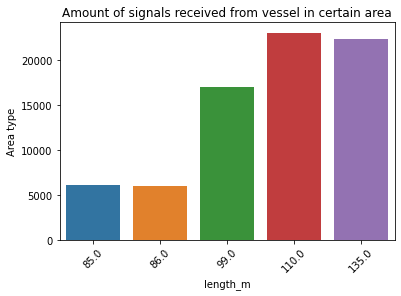

In [21]:
# Data for amount of signals per barge length
sign_amount = bp_ways['length_m'].value_counts()

# Plot data
sb.countplot(x =  bp_ways['length_m'])
plt.xticks(rotation = 45)
plt.ylabel('Area type')
plt.title('Amount of signals received from vessel in certain area');


The bar plot shows that not many signals from 85 meter or 86 meter barges where registered compared to those of 99 meter, 110 meter and 135 meter. This is expected because small wet bulk barges are rare in the West European Delta. These cargos  are mainly transported over the deep and broad water ways. The small barges are suited for small rivers and canals.    

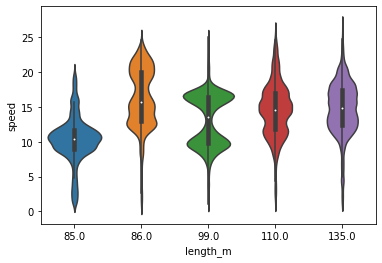

In [22]:
# Create violing plot
sb.violinplot(data = bp_ways, x = 'length_m', y = 'speed');

Yet again an interesting analyses. The visualisation clearly shows that:

- The more length the barge has the faster it's average sail speed seems to uphold.
- Barges of 86m in length are on average the 'fastest' barges
- Barges with a length of 99m clearly show the displacement of the bimodal distribution. Other barge lengths, except for the 85m barges, also show a bimodal figure. Why isn't this the case for this length category?

To find out more further analysis should be made about the directions a vessel sails to. Does that differ?

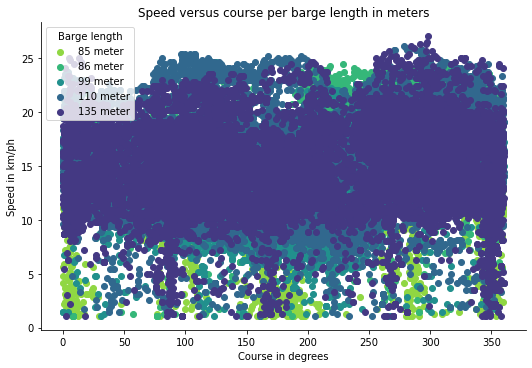

In [23]:
# set up a dictionary to map types to colors

# MODIFY THIS CODE
g = sb.FacetGrid(data = bp_ways, hue = 'length_m', height = 5, aspect = 1.5, palette = 'viridis_r')
g.map(plt.scatter, 'course','speed', alpha = 1);

plt.xlabel('Course in degrees')
plt.ylabel('Speed in km/ph')
plt.title('Speed versus course per barge length in meters')
plt.legend(['85 meter', '86 meter', '99 meter', '110 meter', '135 meter'], title = 'Barge length', loc = 'upper left');


This plot doesn't give a good visual for analysis. Lets explore further by mapping out the courses.

In [24]:
# Create compass heading
heading = []

for i in bp_ways['course']:
    if i < 22.5:
        heading.append('North')        
    elif i < 67.5:
        heading.append('North East')
    elif i < 112.5:
        heading.append('East')
    elif i < 157.5:
        heading.append('South East')
    elif i < 202.5:
        heading.append('South')
    elif i < 247.5:
        heading.append('South West')
    elif i < 292.5:
        heading.append('West')
    elif i < 337.5:
        heading.append('North West')
    elif i < 360:
        heading.append('North')
    else:
        heading.append('Unkown')
        
heading = np.array(heading)

In [25]:
# Add compass heading to dataframe
bp_ways['heading'] = heading

In [26]:
# Check if code works
bp_ways.groupby(['heading']).speed.mean()

heading
East          13.814845
North         14.278776
North East    14.707845
North West    16.229699
South         11.775080
South East    13.138188
South West    13.198343
West          16.001656
Name: speed, dtype: float64

In [27]:
# Order heading logically from North, East, South, West 
headingOrder = ['North', 'North East', 'East', 'South East', 'South', 'South West', 'West', 'North West']
compassHeadings = pd.api.types.CategoricalDtype(ordered = True, categories=headingOrder)
bp_ways['heading'] = bp_ways['heading'].astype(compassHeadings)

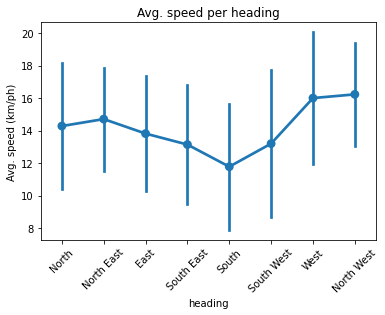

In [28]:
# Plot average speeds and standard deviations
sb.pointplot(data = bp_ways, x= 'heading', y='speed', ci = 'sd')
plt.xticks(rotation = 45)
plt.ylabel('Avg. speed (km/ph)')
plt.title('Avg. speed per heading');

The average speed seems to give a clear view about the influence of directon on barges. Going South, South West or South East will effect the speed in a negative way and heading West or North West will effect the speed in a positive way. 

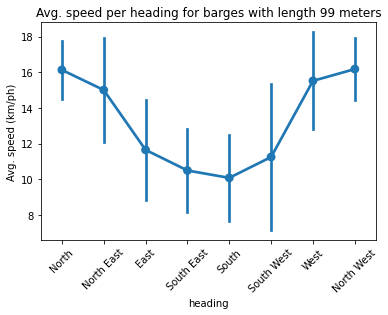

In [29]:
# Plot average speeds and standard deviations
barges_99m = bp_ways[bp_ways['length_m'] == 99.00]
sb.pointplot(data = barges_99m, x= 'heading', y='speed', ci = 'sd')
plt.xticks(rotation = 45)
plt.ylabel('Avg. speed (km/ph)')
plt.title('Avg. speed per heading for barges with length 99 meters');

The barges of 99 meters makes the difference in average speed very clear. Barges goining South, South East, East and South West will, on average, travel with a slower speed that barges heading North, North East, North West or West.

# Plot on map

In [30]:
from arcgis.gis import GIS


C:\Users\Frank\Anaconda3\lib\site-packages\arcgis\features\_data\geodataset\utils.py:16: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime,


In [31]:
import descartes
import geopandas as gpd
import polyline as pol
from shapely.geometry import Point, Polygon

In [32]:
gis = GIS()

In [33]:
loc_barges_85m = gis.map("Netherlands")
slct_85 = bp_ways[bp_ways['length_m'] == 85.00][['location','latitude','longitude']]
slct_85 = slct_85.drop_duplicates()
lyr_85 = gis.content.import_data(slct_85)
loc_barges_85m.add_layer(lyr_85)
loc_barges_85m

MapView(layout=Layout(height='400px', width='100%'))

In [34]:
loc_barges_86m = gis.map("Netherlands")
slct_86 = bp_ways[bp_ways['length_m'] == 86.00][['location','latitude','longitude']]
slct_86 = slct_86.drop_duplicates()
lyr_86 = gis.content.import_data(slct_86)
loc_barges_86m.add_layer(lyr_86)
loc_barges_86m

MapView(layout=Layout(height='400px', width='100%'))

In [35]:
loc_barges_99m = gis.map("Netherlands")
slct_99 = bp_ways[bp_ways['length_m'] == 99.00][['location','latitude','longitude']]
slct_99 = slct_99.drop_duplicates()
lyr_99 = gis.content.import_data(slct_99)
loc_barges_99m.add_layer(lyr_99)
loc_barges_99m

MapView(layout=Layout(height='400px', width='100%'))

In [36]:
loc_barges_110m = gis.map("Netherlands")
slct_110 = bp_ways[bp_ways['length_m'] == 110.00][['location','latitude','longitude']]
slct_110 = slct_110.drop_duplicates()
lyr_110 = gis.content.import_data(slct_110)
loc_barges_110m.add_layer(lyr_110)
loc_barges_110m

MapView(layout=Layout(height='400px', width='100%'))

In [37]:
loc_barges_135m = gis.map("Netherlands")
slct_135 = bp_ways[bp_ways['length_m'] == 135.00][['location','latitude','longitude']]
slct_135 = slct_135.drop_duplicates()
lyr_135 = gis.content.import_data(slct_135)
loc_barges_135m.add_layer(lyr_135)
loc_barges_135m

MapView(layout=Layout(height='400px', width='100%'))

It seems like all the barge of 99 meters travel in the same area's as those of 110 and 135 meters. We also notice that heading east, south and south east are inland routes, meaning going against the currents. This could be the reason why heading this way is slower than heading north, west or north west. Another reason could be the load of the barges. This area is leans heavily on import. Barges travel full inland and empty towards sea ports.

# Conclusion

In this study we'll dive into location data of barges to explore the speeds of barges. This information could be used to enhance estimations of arrival times which contributes to the reliability and therefore reputation of the transportation type.

Based on the data we can advise to take sailing directions into calculation when estimating time of arrivals af barges traveling over the main rivers of the Western Europe Delta. The data clearly shows that barges heading North, North West and West over these rivers are faster the in other directions.

